# Guided Project: Storytelling Data Visualization on Exchange Rates

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Enable matplotlib in Jupyter
%matplotlib inline 

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [3]:
# Data cleaning
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar', 'Period\\Unit:': 'Time'},inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [4]:
euro_to_dollar = exchange_rates[['Time','US_dollar']]

In [5]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.dtypes

Time         datetime64[ns]
US_dollar           float64
dtype: object

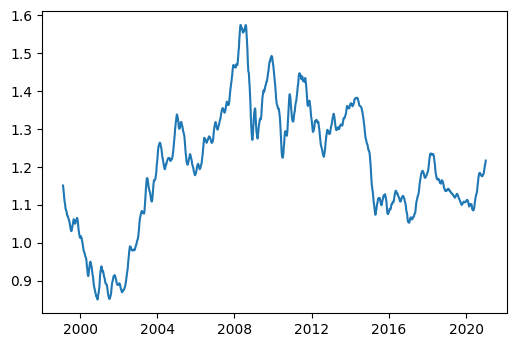

In [6]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
fig, ax = plt.subplots()
ax.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'])

### I will show how the euro-dollar rate has changed during the coronavirus pandemic. I can show the 2020 data and the 2016-2019 data as a baseline.

#### Here I take the FED Deposit Facility Rate 

In [7]:
%pip install full-fred
from full_fred.fred import Fred

You should consider upgrading via the '/dataquest/system/env/python3/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
# FRED API key
api_key = 'ffd285b93d30c7c2f622b4c25afe4d78'

file_path = 'fred_api_key.txt'

with open(file_path, 'w') as file:
    file.write(api_key)

In [9]:
from full_fred.fred import Fred


api_key_file_path = 'fred_api_key.txt'

fred = Fred(api_key_file=api_key_file_path)

fed_rate_id = 'FEDFUNDS'  # FED Federal Funds Effective Rate
fed_rate_df = fred.get_series_df(fed_rate_id)

ecb_rate_id = 'ECBMRRFR' # ECB Main Refinancing Operations Rate
ecb_rate_df = fred.get_series_df(ecb_rate_id)

print("FED Federal Funds Effective Rate")
print(fed_rate_df.head())

print("ECB Main Refinancing Operations Rate")
print(ecb_rate_df.head())


FED Federal Funds Effective Rate
  realtime_start realtime_end        date value
0     2023-11-04   2023-11-04  1954-07-01  0.80
1     2023-11-04   2023-11-04  1954-08-01  1.22
2     2023-11-04   2023-11-04  1954-09-01  1.07
3     2023-11-04   2023-11-04  1954-10-01  0.85
4     2023-11-04   2023-11-04  1954-11-01  0.83
ECB Main Refinancing Operations Rate
  realtime_start realtime_end        date value
0     2023-11-04   2023-11-04  1999-01-01   3.0
1     2023-11-04   2023-11-04  1999-01-02   3.0
2     2023-11-04   2023-11-04  1999-01-03   3.0
3     2023-11-04   2023-11-04  1999-01-04   3.0
4     2023-11-04   2023-11-04  1999-01-05   3.0


In [10]:
fed_rate_df['date'] = pd.to_datetime(fed_rate_df['date'])
print(fed_rate_df.dtypes)

realtime_start            object
realtime_end              object
date              datetime64[ns]
value                     object
dtype: object


In [11]:
ecb_rate_df['date'] = pd.to_datetime(ecb_rate_df['date'])
print(ecb_rate_df.dtypes)
ecb_rate_df.head()

realtime_start            object
realtime_end              object
date              datetime64[ns]
value                     object
dtype: object


,realtime_start,realtime_end,date,value
0,2023-11-04,2023-11-04,1999-01-01,3.0
1,2023-11-04,2023-11-04,1999-01-02,3.0
2,2023-11-04,2023-11-04,1999-01-03,3.0
3,2023-11-04,2023-11-04,1999-01-04,3.0
4,2023-11-04,2023-11-04,1999-01-05,3.0


In [12]:
# Here I reduce the size of the data sets to only 2016 onwards.

maskFedRate = (fed_rate_df['date'] >= '2016-01-01')  & (fed_rate_df['date'] <= euro_to_dollar['Time'].iloc[-1])
maskEcbRate = (ecb_rate_df['date'] >= '2016-01-01')  & (ecb_rate_df['date'] <= euro_to_dollar['Time'].iloc[-1])
maskEurUsd = (euro_to_dollar['Time'] >= '2016-01-01')


In [13]:
maskFedRate

0      False
1      False
2      False
3      False
4      False
       ...  
827    False
828    False
829    False
830    False
831    False
Name: date, Length: 832, dtype: bool

In [14]:
fed_rate_df = fed_rate_df[maskFedRate]
ecb_rate_df = ecb_rate_df[maskEcbRate]
euro_to_dollar = euro_to_dollar[maskEurUsd]

In [15]:
fed_rate_df = fed_rate_df.drop(columns=['realtime_start', 'realtime_end'])
ecb_rate_df = ecb_rate_df.drop(columns=['realtime_start', 'realtime_end'])

fed_rate_df = fed_rate_df.rename(columns={'value': 'fed_rate'})
ecb_rate_df = ecb_rate_df.rename(columns={'value': 'ecb_rate'})

FedEcbRates = fed_rate_df.merge(ecb_rate_df, on='date', how='inner')
FedEcbRates['fed_rate'] = FedEcbRates['fed_rate'].astype(float)
FedEcbRates['ecb_rate'] = FedEcbRates['ecb_rate'].astype(float)

FedEcbRates['Ratio'] = FedEcbRates['fed_rate'] / FedEcbRates['ecb_rate']

#### Now I can compare the FED and ECB interest rates and the USD/EUR exchange rate

In [29]:
plt.style.use('seaborn')

In [31]:
data_before_2020 = euro_to_dollar[euro_to_dollar['Time'] < '2020-01-01']
data_from_2020 = euro_to_dollar[euro_to_dollar['Time'] >= '2020-01-01']

[]

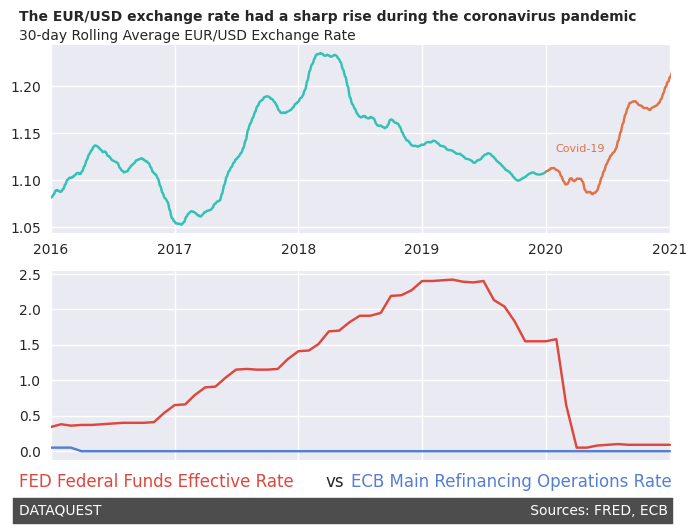

In [134]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(data_before_2020['Time'], data_before_2020['rolling_mean'],color='#32c2b5')
ax1.plot(data_from_2020['Time'], data_from_2020['rolling_mean'],color='#e07248',label='Coronavirus Pandemic')
ax1.set_xlim([735964,737793])

ax1.text(x=735870,y=1.27,s='The EUR/USD exchange rate had a sharp rise during the coronavirus pandemic ',weight='bold',fontsize='10')
ax1.text(x=735870,y=1.25,s='30-day Rolling Average EUR/USD Exchange Rate')
ax1.text(x=737453,y=1.13,s='Covid-19',fontsize=8,color='#e07248')

ax2.text(x=735870,y=-.5,s='FED Federal Funds Effective Rate',fontsize=12,color='#de473e')
ax2.text(x=736775,y=-.5,s='vs',fontsize=12)
ax2.text(x=736850,y=-.5,s='ECB Main Refinancing Operations Rate',fontsize=12,color='#557fd3')

ax2.text(x=735870,y=-.9,s='DATAQUEST'+ ' '*98 +'Sources: FRED, ECB',fontsize=10,color='white',backgroundcolor='#4D4D4D')

ax2.plot(FedEcbRates['date'],FedEcbRates['fed_rate'],color='#de473e')
ax2.plot(FedEcbRates['date'],FedEcbRates['ecb_rate'],color='#557fd3')
ax2.set_xlim([735964,737793])
ax2.set_xticklabels([])
